In [161]:
### applying the clustering in the artificial data
### using k means clustering

In [162]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

In [163]:
## turn of the warning
import warnings
warnings.filterwarnings("ignore")


In [164]:
## lets make some data between 1 and 400 (x and y) co-ordinate
[random.randint(1,400) for i in range(2)]
## it will give you two random numbe x and y from range(1,400)
## we need 50 of that 

[259, 64]

In [165]:
[[random.randint(1,400) for i in range(2)] for j in range(50)]

[[351, 33],
 [340, 225],
 [326, 241],
 [29, 350],
 [210, 98],
 [209, 179],
 [58, 48],
 [398, 106],
 [207, 93],
 [171, 252],
 [327, 293],
 [333, 316],
 [220, 383],
 [164, 267],
 [50, 247],
 [208, 62],
 [268, 242],
 [247, 299],
 [167, 61],
 [305, 313],
 [42, 153],
 [372, 233],
 [39, 355],
 [6, 182],
 [320, 71],
 [8, 134],
 [158, 280],
 [387, 6],
 [154, 378],
 [250, 342],
 [274, 128],
 [48, 133],
 [82, 4],
 [250, 33],
 [308, 275],
 [42, 139],
 [299, 27],
 [243, 183],
 [319, 13],
 [273, 185],
 [77, 139],
 [365, 235],
 [154, 181],
 [45, 327],
 [310, 208],
 [248, 205],
 [253, 177],
 [85, 234],
 [305, 372],
 [361, 328]]

In [166]:
np.array([[random.randint(1,400) for i in range(2)] for j in range(50)],dtype=np.float64)

array([[173.,  28.],
       [244., 317.],
       [169., 278.],
       [397., 199.],
       [383.,  30.],
       [ 56., 206.],
       [387., 238.],
       [  6., 220.],
       [203., 192.],
       [388., 299.],
       [290., 389.],
       [104., 385.],
       [206.,  78.],
       [ 38., 368.],
       [272., 140.],
       [ 85., 146.],
       [297., 271.],
       [ 44., 171.],
       [325., 276.],
       [191., 287.],
       [345., 348.],
       [117., 292.],
       [368., 158.],
       [105.,  42.],
       [318., 197.],
       [ 98., 291.],
       [ 16., 171.],
       [ 70., 214.],
       [ 55., 264.],
       [111.,  27.],
       [240.,  55.],
       [ 85., 282.],
       [ 45., 138.],
       [294., 389.],
       [342.,  86.],
       [262., 151.],
       [116.,  83.],
       [351., 241.],
       [393., 316.],
       [221.,  81.],
       [127., 153.],
       [294., 296.],
       [115., 111.],
       [101., 267.],
       [198., 134.],
       [332., 186.],
       [137., 383.],
       [232.,

In [167]:
## now make three cluster in three different range
data1 = np.array([[random.randint(1,400) for i in range(2)] for j in range(50)],dtype=np.float64)
data2 = np.array([[random.randint(300,700) for i in range(2)] for j in range(50)],dtype=np.float64)
data3 = np.array([[random.randint(600 ,900) for i in range(2)] for j in range(50)],dtype=np.float64)

## remember there are some overlapping in the data

In [168]:
## conat all the data list in  a list
data = np.append(np.append(data1,data2,axis=0),data3,axis=0)

In [169]:
len(data) 

150

In [170]:
data[:,0] ## its all the x axis data

array([321., 255.,  46., 308., 223., 119., 176., 298., 163.,  30., 227.,
       198., 372.,   1., 109., 140., 262., 285., 373., 118.,  95., 339.,
       287., 130., 316.,  48., 226., 178., 108., 323., 320., 278., 400.,
       365., 277., 224., 250.,  42.,  47., 303., 208., 371.,   9., 177.,
       314., 179.,  92., 136.,  46., 136., 429., 653., 579., 568., 401.,
       485., 548., 374., 361., 477., 653., 373., 365., 618., 341., 598.,
       473., 587., 471., 451., 528., 408., 662., 432., 414., 486., 331.,
       668., 619., 537., 563., 435., 340., 366., 515., 471., 452., 430.,
       475., 642., 343., 548., 438., 527., 624., 492., 668., 496., 498.,
       305., 664., 802., 840., 869., 643., 739., 804., 794., 900., 676.,
       693., 790., 666., 785., 672., 822., 684., 719., 869., 631., 863.,
       827., 674., 701., 832., 661., 729., 740., 892., 634., 805., 789.,
       787., 785., 867., 633., 700., 771., 855., 848., 716., 885., 753.,
       722., 733., 716., 753., 670., 889., 628.])

In [171]:
data[:,1] ## this is all the y axis data

array([211.,  42.,  39., 155., 380.,  97., 246., 279.,  59., 149.,  76.,
        78.,  14., 175., 387., 363., 309.,  20., 371., 337., 227., 207.,
       165., 383.,  31., 399., 202., 366., 245., 259.,  12., 335., 352.,
       315., 137., 261., 379.,  30., 177., 206.,  81.,  93., 252., 397.,
       243., 140., 128., 320., 383.,  44., 436., 536., 449., 561., 602.,
       564., 632., 398., 536., 371., 359., 655., 457., 572., 476., 327.,
       503., 493., 522., 349., 332., 348., 641., 428., 365., 471., 437.,
       454., 431., 639., 572., 505., 650., 465., 557., 360., 388., 620.,
       494., 581., 344., 637., 489., 377., 525., 346., 523., 496., 638.,
       627., 703., 653., 719., 802., 866., 886., 782., 778., 892., 878.,
       657., 834., 854., 764., 862., 618., 796., 733., 841., 831., 748.,
       627., 774., 781., 700., 673., 764., 802., 646., 791., 834., 897.,
       683., 879., 864., 713., 666., 832., 600., 785., 763., 608., 868.,
       857., 637., 615., 700., 684., 824., 781.])

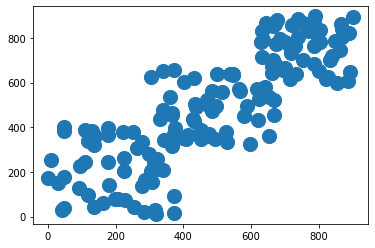

In [172]:
plt.scatter(data[:,0],data[:,1],s=200)

In [173]:
## adding some kind of label to the data
## so we can name them
label1 = np.array([0 for i in range(50)])
label2 = np.array([1 for i in range(50)])
label3 = np.array([2 for i in range(50)])

In [174]:
label = np.append(np.append(label1,label2,axis=0),label3,axis=0)

In [175]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [176]:
##create the data frame to work efficiently with the data
df = pd.DataFrame({'data_x':data[:,0],'data_y':data[:,1],'labels':label})

In [177]:
df.head()

,data_x,data_y,labels
0,321.0,211.0,0
1,255.0,42.0,0
2,46.0,39.0,0
3,308.0,155.0,0
4,223.0,380.0,0


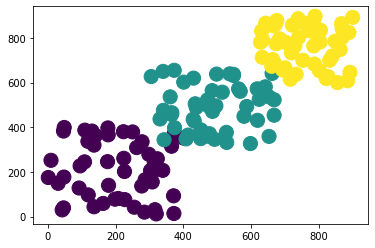

In [178]:
color = ['green','blue','purple']
plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200)

In [179]:
kmeans_model = KMeans(n_clusters=3,max_iter=10000).fit(data)

In [180]:
## see the predicted label
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [181]:
## because we did the kmeans clustering there must be three centroids
## three centroid of the three cluster
centroids = kmeans_model.cluster_centers_

In [182]:
centroids

array([[756.50980392, 760.50980392],
       [200.36734694, 207.69387755],
       [485.72      , 485.52      ]])

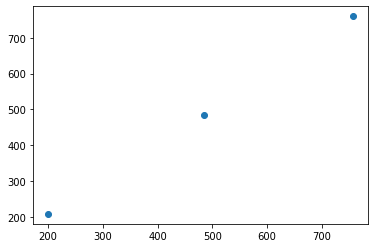

In [183]:
plt.scatter(centroids[:,0],centroids[:,1])

In [184]:
### remember these label that are generated by the kmeasn are different than the label you had assigned

In [185]:
#### now to evaluate a cluster you do not need
## to adjust the cluster generated label to your label
## we habe nothing to do with the label value
## we just worry are their in the same cluster
print("Homogenity score",metrics.homogeneity_score(label,kmeans_model.labels_))
print("Completeness score",metrics.completeness_score(label,kmeans_model.labels_))
print("V-measure score",metrics.v_measure_score(label,kmeans_model.labels_))
print("Adjusted rand score",metrics.adjusted_rand_score(label,kmeans_model.labels_))
print("Siluate score",metrics.silhouette_score(data,kmeans_model.labels_))


Homogenity score 0.8895533291964826
Completeness score 0.889661310345643
V-measure score 0.8896073164943562
Adjusted rand score 0.9215523820796108
Siluate score 0.5098543472830085


In [186]:
### so you can see that the result does not on the label you assigned and the kmeans does
### and the siluate score does not nees the original label

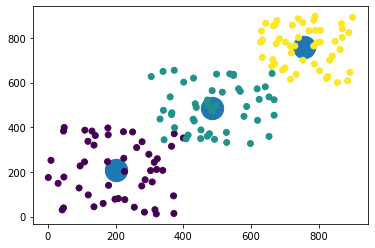

In [187]:

plt.scatter(centroids[:,0],centroids[:,1],s=500)
plt.scatter(df['data_x'],df['data_y'],c=df['labels'])

In [188]:
## lets done an inference
test_data = np.array([[200,300],[234,345],[700,900]])

In [189]:
kmeans_model.predict(test_data)

array([1, 1, 0], dtype=int32)

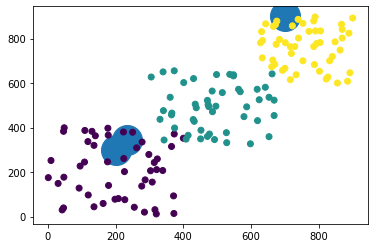

In [190]:
plt.scatter(test_data[:,0],test_data[:,1],s=900)
plt.scatter(df['data_x'],df['data_y'],c=df['labels'])

In [191]:
## exploring the iris data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [192]:
df = load_iris()

In [193]:
print(df.data)
print(df.target_names)
print(df.target)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [194]:
## making a pandas dataframe from the numpy
iris = pd.DataFrame(data=df.data,columns=df.feature_names)
iris['target'] = np.array(df.target)

In [195]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [196]:
### now we apply the clusterig algorithm  to the iris data
iris.shape

(150, 5)

In [197]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Text(0, 0.5, 'sepal width')

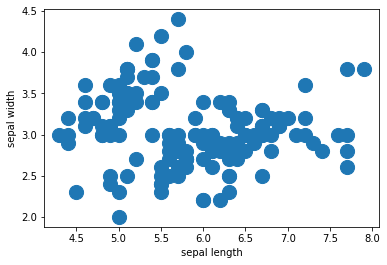

In [198]:
### plotting the sepal length and sepal width of the dataset of different species
plt.scatter(iris['sepal length (cm)'],iris['sepal width (cm)'],s=200)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'petal width')

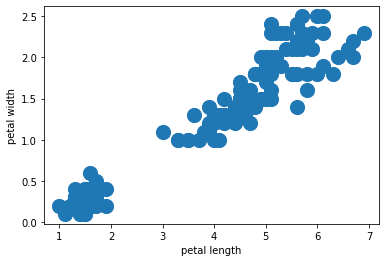

In [199]:
### plotting the sepal length and sepal width of the dataset of different species
plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'],s=200)
plt.xlabel('petal length')
plt.ylabel('petal width')

In [200]:
## so based on the petal width there are a obvious cluster 
## there are two different cluster one with small petal width 
## and on the high petal width

Text(0, 0.5, 'petal length')

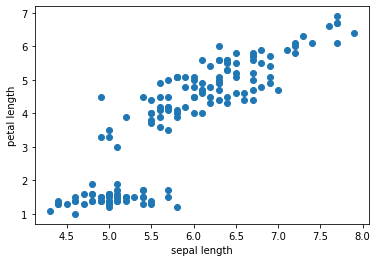

In [201]:
plt.scatter(iris['sepal length (cm)'],iris['petal length (cm)'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

In [202]:
## there are almost three cluster inth is point of view
## so lets use this data and apply k means clustering in this data
iris_2D = iris[['sepal length (cm)','petal length (cm)']]

In [203]:
iris_2D.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [204]:
iris_2D = np.array(iris_2D)

In [205]:
kmeans_one = KMeans(n_clusters=3,max_iter=10000).fit(iris_2D)

In [206]:
kmeans_one.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [207]:
centroids = kmeans_one.cluster_centers_

Text(0, 0.5, 'petal length')

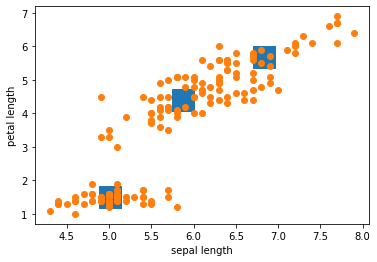

In [208]:
plt.scatter(centroids[:,0],centroids[:,1],s=500,marker='s')
plt.scatter(iris['sepal length (cm)'],iris['petal length (cm)'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

In [209]:
print("Homogenity score    : ",metrics.homogeneity_score(iris.target,kmeans_one.labels_))
print("Completeness score  : ",metrics.completeness_score(iris.target,kmeans_one.labels_))
print("V-measure score     : ",metrics.v_measure_score(iris.target,kmeans_one.labels_))
print("Adjusted rand score : ",metrics.adjusted_rand_score(iris.target,kmeans_one.labels_))
print("Siluate score       : ",metrics.silhouette_score(iris,kmeans_one.labels_))

Homogenity score    :  0.7033177646052958
Completeness score  :  0.7096993707802843
V-measure score     :  0.706494157075837
Adjusted rand score :  0.6988627672348092
Siluate score       :  0.5388007800309613


In [210]:
## now we will do clustering using 4 features
iris_ = iris.drop('target',axis=1)
kmeans_one = KMeans(n_clusters=3,max_iter=10000).fit(iris_)

In [211]:
centroids = kmeans_one.cluster_centers_

Text(0, 0.5, 'petal length')

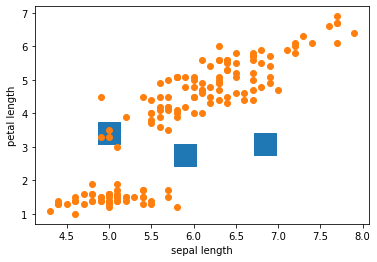

In [212]:
plt.scatter(centroids[:,0],centroids[:,1],s=500,marker='s')
plt.scatter(iris['sepal length (cm)'],iris['petal length (cm)'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

In [213]:
print("Homogenity score    : ",metrics.homogeneity_score(iris.target,kmeans_one.labels_))
print("Completeness score  : ",metrics.completeness_score(iris.target,kmeans_one.labels_))
print("V-measure score     : ",metrics.v_measure_score(iris.target,kmeans_one.labels_))
print("Adjusted rand score : ",metrics.adjusted_rand_score(iris.target,kmeans_one.labels_))
print("Siluate score       : ",metrics.silhouette_score(iris,kmeans_one.labels_))

Homogenity score    :  0.7514854021988339
Completeness score  :  0.7649861514489816
V-measure score     :  0.7581756800057786
Adjusted rand score :  0.7302382722834697
Siluate score       :  0.553540214427476


In [214]:
## using clustering with other method
#  centroids based (k means clustering)
#  hierarchical clustering (points are callculated by one another no centroid) 
#  these algorithm name is   (agglomerative clustering) (BIRCH clustering)
#  Distributon based clustering (by sampling a perticular portion from the data)
## the algo name is gausian mixtr models
## density based  that is based on density figh density make a cluster
### DB SCAN and mean shift clustering


In [215]:
### multiple clustering

In [216]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [217]:
iris_labels = iris['target']
iris_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [218]:
def build_model(clustering_model,data,labels):
  model = clustering_model
  print("Homogenity score    : ",metrics.homogeneity_score(label,model.labels_))
  print("Completeness score  : ",metrics.completeness_score(label,model.labels_))
  print("V-measure score     : ",metrics.v_measure_score(label,model.labels_))
  print("Adjusted rand score : ",metrics.adjusted_rand_score(label,model.labels_))
  print("Siluate score       : ",metrics.silhouette_score(data,model.labels_))


In [219]:
### import all the clustering algorithm available
from sklearn.cluster import *

In [220]:
def k_means(data,n,max_iter=1000):
  model = KMeans(n_clusters=n,max_iter=max_iter).fit(data)
  return model

In [221]:
build_model(k_means(iris_,3),iris_,iris_labels)

Homogenity score    :  0.7514854021988338
Completeness score  :  0.7649861514489815
V-measure score     :  0.7581756800057784
Adjusted rand score :  0.7302382722834697
Siluate score       :  0.5528190123564091


In [222]:
## choosing algorithm

## if the dataset is large and a lot of cluster use  "Birch,aggoloromative algorithm"
## this is created using a tree beased data
## for large dataset, it create a branch in  atree and all the leaf in  a branch is in  a same cluster

## aggloromative can bo the same thig with the bottom up approach


## id the data set is small but cluster is many so you use meanshift,affinity propagation agorithm
## mean shift use pair wise distance
## affinity porpagationn use graph algorithm to find the closest point
## you dont need to set the cluster number in affinity propagatopn

## if the dataset is large but you want small claster
## then use the kmeans and DBSCAN
## use k means when you want even type cluster
## like if the cluster size is close
## if not use the dbscan


## few cluster and mediam data
## use the Spectral algorithm
## use distance based like knn to create the groups

In [223]:
## hierrarchical clustering
## connectiviti based clustering
### implement the aggloromative clustering

In [224]:
def aggloromative_cluster_model(data,n):
  model = AgglomerativeClustering(n_clusters=n).fit(data)
  return model

In [225]:
build_model(aggloromative_cluster_model(iris_,3),iris_,iris_labels)

Homogenity score    :  0.7608008469718723
Completeness score  :  0.7795958005591144
V-measure score     :  0.7700836616487869
Adjusted rand score :  0.7311985567707745
Siluate score       :  0.5543236611296415


In [226]:
#### using the DBscan clustering
##eps         = the minimum distance to consider them as neighbors. if you choose to small mst of them cant create cluster.
                ## setting too much data will creae one giant cluseter which is useless
##min_samples = the minimum number of elements that forms a dense area. for noisy data use large number

def DBscan_model(data,eps=.45,min_samples=4):
  model = DBSCAN(eps=eps,min_samples=min_samples).fit(data)
  return model

In [227]:
build_model(DBscan_model(iris_),iris_,iris_labels)

Homogenity score    :  0.5773205947971476
Completeness score  :  0.6093983666695363
V-measure score     :  0.5929259393972258
Adjusted rand score :  0.5084974632998323
Siluate score       :  0.3724439898969612


In [228]:
## mean shift algorith
### the std is the only hyper parameter is the meanshift
### if you want to use the smaller neighborhood then use the small value
### and if it is not then use hugr
## Mean shift algorithm dont need to specfy the cluster number

In [230]:
def mean_shidt_fn(data,bandwidth=0.85):
  model = MeanShift(bandwidth=bandwidth).fit(data)
  return model

In [231]:
build_model(mean_shidt_fn(iris_),iris_,iris_labels)

Homogenity score    :  0.7603645798041669
Completeness score  :  0.7717917344958113
V-measure score     :  0.7660355440487252
Adjusted rand score :  0.7436826319432357
Siluate score       :  0.5511573791952854


In [232]:
## applying mean shift with another value
def mean_shidt_fn(data,bandwidth=1):
  model = MeanShift(bandwidth=bandwidth).fit(data)
  return model

In [233]:
build_model(mean_shidt_fn(iris_),iris_,iris_labels)

Homogenity score    :  0.5537492887432671
Completeness score  :  0.9490204434010504
V-measure score     :  0.6994010915914346
Adjusted rand score :  0.5583714437541352
Siluate score       :  0.685788171261719


In [234]:
## you use birch algorithm only use when dataset is high and cluster is also
## a lot
## remember birch is an online algorithm so it can take stream of data
## and update the cluster
## birch clustering algorithm can detect and remove outliers from the cluster

# BIRCH stands for "Balanced Iterative Reducing and Clustering using Hierarchies"
# remember birch can incrementally change the cluster

In [235]:
def birch_fn(data,n=3):
  model = Birch(n_clusters=n).fit(data)
  return model

In [236]:
build_model(birch_fn(iris_),iris_,iris_labels)

Homogenity score    :  0.6747055693979638
Completeness score  :  0.7383596460504097
V-measure score     :  0.7050989012575005
Adjusted rand score :  0.6096252514698314
Siluate score       :  0.5019524848046075


In [243]:

## affinity propagation is used in a small dataset but the cluster number is high
## number of cluster is not needed to tell
## its actually used the nearest neighbor algorithm to find
def afinity_fn(data,damping=0.6,max_iter=1000):
  model  = AffinityPropagation(damping=damping).fit(data)
  return model

In [244]:
build_model(afinity_fn(iris_),iris_,iris_labels)

Homogenity score    :  0.843993810083683
Completeness score  :  0.4870126988159714
V-measure score     :  0.6176313947144149
Adjusted rand score :  0.4383215937355036
Siluate score       :  0.3422191157214031


In [245]:
#### mini batch k means clustering
#### k means and db scan use large dataset but small number of cluster
#### k means calculate the centroid
#### to do that
#### use the mini batch clustering used ramdom sub sample data
#### thats why called mini batch

In [247]:
def mini_batch_fn(data,n=3,max_iter=10000):
  model = MiniBatchKMeans(n_clusters=n,max_iter=max_iter).fit(data)
  return model

In [248]:
build_model(mini_batch_fn(iris_),iris_,iris_labels)

Homogenity score    :  0.7514854021988338
Completeness score  :  0.7649861514489815
V-measure score     :  0.7581756800057784
Adjusted rand score :  0.7302382722834697
Siluate score       :  0.5528190123564091


In [249]:
### hyper parameter tuning in clustering
### hyper parameter tuning in k means and DBSCAN algorithm
### we use the sihloute score to evaluate
### because we dont need the label data for that
### s = (b(i)-a(i))/(max(a(i),b(i)))
### silhoute shore is 1 means very good
### -1 means very bad 
### 0 mans over lapping

In [250]:
## setting hypr parameter
## the most important hyper parameter classter number is the most imporant
## for iris its 3
## for mnist its 10
## use elbow method for finding k means clustering
## its use the brute force and try to find the distance from the 
## point to the centroid
## when the avg distance fall its the number of cluster
## you can also find the sihluate score for each number of cluster
## and by comparing the score of the evaluation 
## you can find which one is the best number of cluster for the work


In [251]:
## your initial value is also a hyper parameter
## if you can do it smartly your algorithm will converge fast
## distance measure you can use distance or cosine or angle distance

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
## you may think about gridsearchcv
## but you cant 
## because you dont know the output
## so import this
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.metrics import silhouette_score


In [261]:
## we use this to find the best for iris_2d data
## define  a set of cluster
parameters = {'n_clusters':[2,3,4,5,6,7,8,9,10,11]}

In [262]:
parameter_grid = ParameterGrid(parameters)

In [263]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 6},
 {'n_clusters': 7},
 {'n_clusters': 8},
 {'n_clusters': 9},
 {'n_clusters': 10},
 {'n_clusters': 11}]

In [264]:
## so we made 8 models
model = KMeans()
score = []
for param in parameter_grid:
  model.set_params(**param).fit(iris_2D)
  score.append(silhouette_score(iris_2D,model.labels_))

print(score)

[0.7097529826994816, 0.5890584158017611, 0.5645593160995663, 0.5577931215347036, 0.4159480581366429, 0.40980502883342224, 0.40357610859350646, 0.4189298199651592, 0.40943877781228166, 0.4204618212819906]


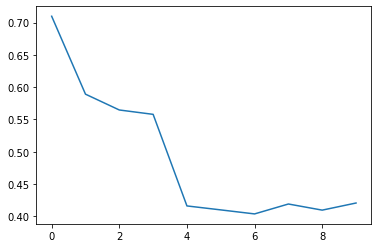

In [271]:
plt.plot(score)

Text(0, 0.5, 'petal length')

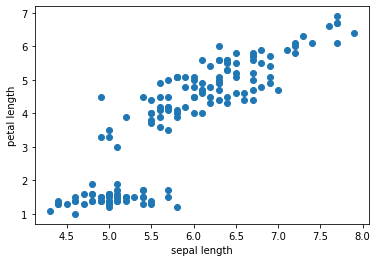

In [276]:
## remember based on the 2D there are two cluster
plt.scatter(iris['sepal length (cm)'],iris['petal length (cm)'])
plt.xlabel('sepal length')
plt.ylabel('petal length')

Text(0, 0.5, 'petal length')

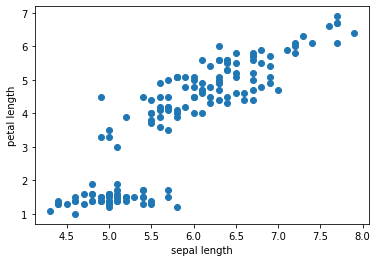

In [275]:
### doing it from dbscan

In [277]:
## you can see there are two cluster
## in eps = minimum distance to consider as neighbors
## and the min_sample =  this is the minimum number od data item to consider as a cluster

In [289]:
parameters = {
    'eps': [0.9,.5,.10,.12,.14,.20],
    'min_samples': [2,3,4,5]
}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 2},
 {'eps': 0.9, 'min_samples': 3},
 {'eps': 0.9, 'min_samples': 4},
 {'eps': 0.9, 'min_samples': 5},
 {'eps': 0.5, 'min_samples': 2},
 {'eps': 0.5, 'min_samples': 3},
 {'eps': 0.5, 'min_samples': 4},
 {'eps': 0.5, 'min_samples': 5},
 {'eps': 0.1, 'min_samples': 2},
 {'eps': 0.1, 'min_samples': 3},
 {'eps': 0.1, 'min_samples': 4},
 {'eps': 0.1, 'min_samples': 5},
 {'eps': 0.12, 'min_samples': 2},
 {'eps': 0.12, 'min_samples': 3},
 {'eps': 0.12, 'min_samples': 4},
 {'eps': 0.12, 'min_samples': 5},
 {'eps': 0.14, 'min_samples': 2},
 {'eps': 0.14, 'min_samples': 3},
 {'eps': 0.14, 'min_samples': 4},
 {'eps': 0.14, 'min_samples': 5},
 {'eps': 0.2, 'min_samples': 2},
 {'eps': 0.2, 'min_samples': 3},
 {'eps': 0.2, 'min_samples': 4},
 {'eps': 0.2, 'min_samples': 5}]

------------------------------
parameter : {'eps': 0.9, 'min_samples': 2} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.9, 'min_samples': 3} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.9, 'min_samples': 4} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.9, 'min_samples': 5} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.5, 'min_samples': 2} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.5, 'min_samples': 3} 
score     : 0.7116091684163499 
------------------------------
------------------------------
parameter : {'eps': 0.5, 'min_samples': 4} 
score     : 0.7116091684163499 
------------------------------
------------------------------
par

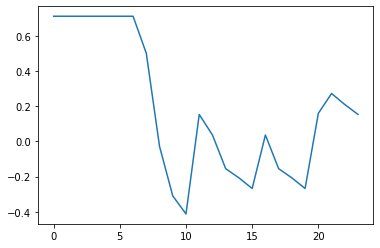

In [293]:
score = []
for param in parameter_grid:
  model.set_params(**param).fit(iris_2D)
  score.append(silhouette_score(iris_2D,model.labels_))
  print("------------------------------")
  print("parameter : {} ".format(param))
  print("score     : {} ".format(silhouette_score(iris_2D,model.labels_)))
  print("------------------------------")


plt.plot(score)



In [295]:
## apply clustering using image data
from sklearn.datasets import fetch_openml

In [305]:
# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1)


In [307]:
df = pd.DataFrame(data=mnist.data,columns=mnist.feature_names)

In [308]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
## ok we have the label too but we dont add it becayse we dont need it
## it will be added later


In [312]:
def display(index):
  plt.imshow(df.loc[index].values.reshape(28,28))

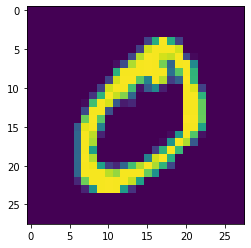

In [313]:
display(1)

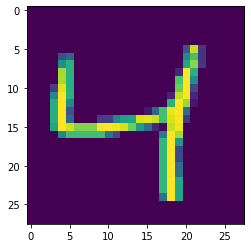

In [315]:
display(2)

In [316]:
moden = KMeans(n_clusters=10,max_iter=1000).fit(df)

In [318]:
kmeans_centroid = moden.cluster_centers_

In [323]:
silhouette_score(df,moden.labels_)
  

0.05877299856360276

In [327]:
df['label'] = np.array(mnist.target)

In [328]:
mnist_test = df.sample(10)

In [329]:
mnist_test_feature  = mnist_test.drop('label',axis=1)

In [330]:
mnist_test_label = mnist_test['label']

In [331]:
pred_cluster = moden.predict(mnist_test_feature)

In [333]:
pred_result = pd.DataFrame({'actual_digit':mnist_test_label,'cluster':pred_cluster})

In [334]:
pred_result

,actual_digit,cluster
43640,6,5
30051,0,2
26632,2,9
23354,6,6
47872,3,8
41981,4,1
18277,9,1
29446,0,2
44259,8,9
29310,5,9


In [335]:
## just see that if the unique every digit goes to the unique cluster
## this are just computer generated cluster number
## so if every unique digit take unique cluster 
## you done  a preety good job
## here 4 and 9 comes to same cluster cause in english they have almost same structure
## and also 8 and 5 so 2 mismatch so we have done a modarately good job